**Problem 5.1** Show that the logistic sigmoid function $sig[z]$ becomes $0$ as $z → −∞$, is $0.5$ when $z = 0$, and becomes $1$ when $z → ∞$, where:
$$sig[z] = \frac{1}{1 + exp[-z]}. \tag{5.32}$$

Let's find the limit of $sig[z]$ as $z \to -\infty$, and as $z \to 0$:

$$\lim_{z \to -\infty} sig[z] = \lim_{z \to -\infty} \left(\frac{1}{1 + exp[-z]}\right)$$
$$ = \frac{1}{1 + exp[\infty]} = \frac{1}{1 + \infty} = \frac{1}{\infty} = 0.$$

$$\lim_{z \to 0} sig[z] = \lim_{z \to 0} \left(\frac{1}{1 + exp[-z]}\right)$$
$$ = \frac{1}{1 + exp[0]} = \frac{1}{1 + 1} = 0.5.$$

**Problem 5.2** The loss $L$ for binary classification for a single training pair $\{\mathbf{x},y\}$ is:
$$L = -(1 - y)\log \left[1 - sig[f[\mathbf{x}, \phi]]\right] - y \log \left[sig[f[\mathbf{x}, \phi]]\right].$$
where $sig[•]$ is defined in equation $5.32$. Plot this loss as a function of the transformed network output $sig[f[x,ϕ]] ∈ [0,1]$ (i) when the training label $y = 0$ and (ii) when $y = 1$.

If $y = 0$, then: $L = - \log \left[1 - sig[f\left[x, \phi\right]]\right]$.<br>
If $y = 1$, then: $L = - \log \left[sig[f\left[x, \phi\right]]\right]$.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# define some input
x = np.arange(-10.0, 10.0, 0.01)

# define y with all ones and with all zeros
y1 = np.zeros(x.shape[0])
y2 = np.ones(x.shape[0])

# define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
# define loss function
def calc_loss_for_each_example(x, y):
    return -(1 - y) * np.log(1 - sigmoid(x)) - y * np.log(sigmoid(x))

L1 = calc_loss_for_each_example(x, y1)
L2 = calc_loss_for_each_example(x, y2)

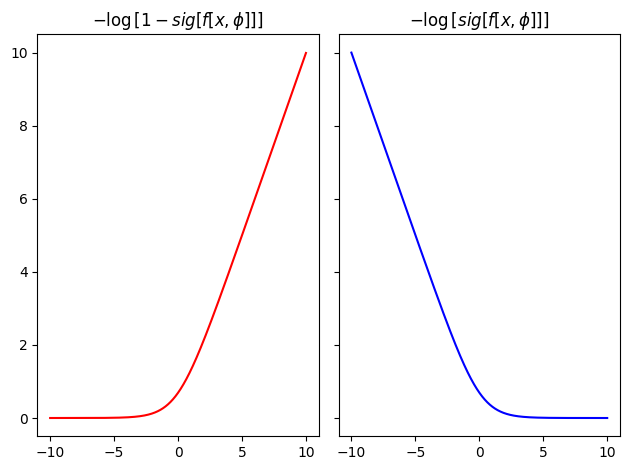

In [11]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].plot(x, L1, c="red")
ax[0].set_title(r"$-\log \left[1 - sig[f[x,\phi]]\right]$")
ax[1].plot(x, L2, c="blue")
ax[1].set_title(r"$-\log \left[sig[f[x,\phi]]\right]$")
plt.tight_layout()
plt.show()

**Problem 5.3∗** Suppose we want to build a model that predicts the direction $y$ in radians of the prevailing wind based on local measurements of barometric pressure $\mathbf{x}$. A suitable distribution over circular domains is the von Mises distribution (figure 5.13):
<center>
    <img src="assets/5.13.jpeg">
</center>
$$Pr(y | \mu, \kappa) = \frac{exp[\kappa \cos(y - \mu)]}{2 \pi \cdot Bessel_0[\kappa]},$$
where $µ$ is a measure of the mean direction and $κ$ is a measure of concentration (i.e., the inverse of the variance). The term $Bessel_0[κ]$ is a modified Bessel function of the first kind of order $0$. Use the recipe from section $5.2$ to develop a loss function for learning the parameter $µ$ of a model $f[x,ϕ]$ to predict the most likely wind direction. Your solution should treat the concentration $κ$ as constant. How would you perform inference?

1) Since we chose a suitable probability distribution $Pr(y | \theta)$, we have done already the first step.
2) Next, we set the machine learning model $f[x, \phi]$ to predict the $\mu$ parameter of the distribution and keep $\kappa$ fixed:
   $$Pr(y | \theta) = Pr(y | f[x, \phi], \kappa)$$.
3) To train the model, find the network parameters $\hat{\phi}$ that minimize the negative log-likelihood loss over the training dataset pairs $\{x_i, y_i\}$:
   $$\hat{\phi} = \underset{\phi}{\mathrm{argmin}}\left( -\sum_{i=1}^{I}\log \left[Pr(y_i | f[x_i, \phi], \kappa)\right]\right)$$
             $$ = \underset{\phi}{\mathrm{argmin}}\left( -\sum_{i=1}^{I} \log \left[\frac{exp[\kappa \cos(y_i - f[x_i, \phi])]}{2\pi \cdot Bessel_0[\kappa]} \right]\right)$$
   $$\hat{\phi} = \underset{\phi}{\mathrm{argmin}}\left(-\sum_{i=1}^{I} \kappa \cos(y_i - f[x_i, \phi]) - \log \left[2\pi \cdot Bessel_0[\kappa]\right]\right)$$
   Since $\kappa$ is constant, we can remove all the terms that depend on it along with any constants:
   $$\hat{\phi} = \underset{\phi}{\mathrm{argmin}}\left( -\sum_{i=1}^{I}\cos(y_i - f[x_i, \phi]) \right).$$
4) To perform inference for a new text example $\mathbf{x}$, return either the full distribution $Pr(y | f[\mathbf{x}, \hat{\phi}])$, or the value where this distribution is maximized:
   $$\hat{y} = \underset{\phi}{\mathrm{argmax}} \left[Pr(y | f[\mathbf{x}, \hat{\phi}], \kappa)\right].$$

**Problem 5.4∗** Sometimes, the outputs $y$ for input $x$ are multimodal (figure $5.14a$); there is more than one valid prediction for a given input. Here, we might use a weighted sum of normal components as the distribution over the output. This is known as a mixture of Gaussians model. For example, a mixture of two Gaussians has parameters $θ = {λ,µ_1,{σ_1}^2,µ_2,{σ_2}^2}$:
$$Pr(y | \lambda, \mu_1, \mu_2, {\sigma_1}^2, {\sigma_2}^2) = \frac{\lambda}{\sqrt{2\pi {\sigma_1}^2}} \exp\left[\frac{-(y - \mu_1)^2}{2{\sigma_1}^2}\right] + \frac{1 - \lambda}{\sqrt{2\pi {\sigma_2}^2}} \exp\left[\frac{-(y - \mu_2)^2}{2{\sigma_2}^2}\right],$$
where $λ ∈ [0,1]$ controls the relative weight of the two components, which have means $µ_1$, $µ_2$ and variances ${σ_1}^2$, ${σ_2}^2$, respectively. This model can represent a distribution with two peaks (figure 5.14b) or a distribution with one peak but a more complex shape (figure 5.14c). Use the recipe from section $5.2$ to construct a loss function for training a model $f[x,ϕ]$ that takes input $x$, has parameters $ϕ$, and predicts a mixture of two Gaussians. The loss should be based on $I$ training data pairs $\{x_i,y_i\}$. What problems do you foresee when performing inference?
<center>
    <img src="assets/5.14.jpeg">
</center>

Define a network model with $5$ outputs as follows:
$$\lambda = \mathbf{sig}[\mathbf{f_1}[\mathbf{x}, \phi]],$$
$$\mu_1 = \mathbf{f_2}[\mathbf{x}, \phi],$$
$$\mu_2 = \mathbf{f_3}[\mathbf{x}, \phi],$$
$${\sigma_1}^2 = \mathbf{f_4}[\mathbf{x}, \phi]^2,$$
$${\sigma_2}^2 = \mathbf{f_5}[\mathbf{x}, \phi]^2.$$
We apply the sigmoid operation to $\mathbf{f_1}[\mathbf{x}, \phi]$, because $\lambda$ is a value between $0$ and $1$.

To train the model, find the network parameters $\hat{\phi}$ that minimize the negative log-likelihood loss over the training dataset pairs $\{x_i, y_i\}$:
$$\hat{\phi} = \underset{\phi}{\mathrm{argmin}} -\sum_{i=1}^{I}\log \Big[Pr\big(y_i \Big{|} \mathbf{sig}[\mathbf{f_1}[\mathbf{x_i}, \phi]], \mathbf{f_2}[\mathbf{x_i}, \phi], \mathbf{f_3}[\mathbf{x_i}, \phi], \mathbf{f_4}[\mathbf{x_i}, \phi]^2, \mathbf{f_5}[\mathbf{x_i}, \phi]^2\big)\Big]$$
$$ = \underset{\phi}{\mathrm{argmin}} -\sum_{i=1}^{I} \log \left( \frac{\mathbf{sig}[\mathbf{f_1}[\mathbf{x_i}, \phi]]}{\sqrt{2\pi \cdot {\mathbf{f_4}[\mathbf{x_i}, \phi]}^2}} \exp\left[\frac{-(y_i - \mathbf{f_2}[\mathbf{x_i}, \phi])^2}{2\cdot{\mathbf{f_4}[\mathbf{x_i}, \phi]}^2}\right] + \frac{1 - \mathbf{sig}[\mathbf{f_1}[\mathbf{x_i}, \phi]]}{\sqrt{2\pi \cdot {\mathbf{f_5}[\mathbf{x_i}, \phi]}^2}} \exp\left[\frac{-(y_i - \mathbf{f_3}[\mathbf{x_i}, \phi])^2}{2\cdot{\mathbf{f_5}[\mathbf{x_i}, \phi]}^2}\right] \right).$$

* At inference, if we return the value where this distribution is maximized, we wouldn't make use of the mutlimodality in the gaussian mixture. So, we maybe need a different approach.
* Also, if at inference time, $\mathbf{f_4}[\mathbf{x_i}, \phi]$ or $\mathbf{f_5}[\mathbf{x_i}, \phi]$ were equal to $0$, we would get $\infty$ which would cause instability in our inference.

**Problem 5.5** Consider extending the model from problem $5.3$ to predict the wind direction using a mixture of two von Mises distributions. Write an expression for the likelihood $Pr(y|θ)$ for this model. How many outputs will the network need to produce?

If we use a mixture of two von Mises distribution, the probability distribution would be:
$$Pr(y | \theta) = Pr(y | \lambda, \mu_1, \kappa_1, \mu_2, \kappa_2) = \lambda \cdot \frac{exp[\kappa_1 \cos(y - \mu_1)]}{2 \pi \cdot Bessel_0[\kappa_1]} + (1 - \lambda) \cdot \frac{exp[\kappa_2 \cos(y - \mu_2)]}{2 \pi \cdot Bessel_0[\kappa_2]}$$

$\kappa_1$ and $\kappa_2$ are fixed. So, we will need the network to output 3 outputs for $\lambda$, $\mu_1$, and $\mu_2$.
$$\lambda = \mathbf{sig}[\mathbf{f_1}[\mathbf{x}, \phi]],$$
$$\mu_1 = \mathbf{f_2}[\mathbf{x}, \phi],$$
$$\mu_2 = \mathbf{f_3}[\mathbf{x}, \phi].$$

$$\hat{\phi} = \underset{\phi}{\mathrm{argmin}}\left( -\sum_{i=1}^{I}\log \left[Pr(y_i | \mathbf{sig}[\mathbf{f_1}[\mathbf{x_i}, \phi]], \mathbf{f_2}[\mathbf{x_i}, \phi], \mathbf{f_3}[\mathbf{x_i}, \phi], \kappa_1, \kappa_2)\right]\right)$$

$$ = \underset{\phi}{\mathrm{argmin}}\left( -\sum_{i=1}^{I} \log \left[\mathbf{sig}[\mathbf{f_1}[\mathbf{x_i}, \phi]] \cdot \frac{exp[\kappa \cos(y_i - \mathbf{f_2}[\mathbf{x_i}, \phi])]}{2\pi \cdot Bessel_i[\kappa]} + (1 - \mathbf{sig}[\mathbf{f_1}[\mathbf{x_i}, \phi]]) \cdot \frac{exp[\kappa \cos(y_i - \mathbf{f_3}[\mathbf{x_i}, \phi])]}{2\pi \cdot Bessel_i[\kappa]} \right]\right).$$



**Problem 5.6** Consider building a model to predict the number of pedestrians $y ∈ \{0,1,2,...\}$ that will pass a given point in the city in the next minute, based on data $\mathbf{x}$ that contains information about the time of day, the longitude and latitude, and the type of neighborhood. A suitable distribution for modeling counts is the Poisson distribution (figure $5.15$). This has a single parameter $λ > 0$ called the rate that represents the mean of the distribution. The distribution has probability density function:
$$Pr(y = k) = \frac{\lambda^k e^{-\lambda}}{k!}.$$
Design a loss function for this model assuming we have access to $I$ training pairs $\{\mathbf{x_i},y_i\}$.
<center>
    <img src="assets/5.15.jpeg">
</center>


Our likelihood function will be:
$$Pr(y | \theta) = Pr(y | \lambda) = \frac{\lambda^y e^{-\lambda}}{y!}.$$

We will set the neural network to learn the parameter $\lambda$:
$$\lambda = \mathbf{f}[\mathbf{x}, \phi],$$
$$Pr(y | \mathbf{f}[\mathbf{x}, \phi]) = \frac{{\mathbf{f}[\mathbf{x}, \phi]}^y e^{-\mathbf{f}[\mathbf{x}, \phi]}}{y!}.$$

The loss function will be:
$$L = -\sum_{i=1}^{I} \log \left[\frac{{\mathbf{f}[\mathbf{x_i}, \phi]}^{y_i} e^{-\mathbf{f}[\mathbf{x_i}, \phi]}}{y_i!}\right]$$
$$ = -\sum_{i=1}^{I}\left( y_i \log \left[\mathbf{f}[\mathbf{x_i}, \phi]\right] - \mathbf{f}[\mathbf{x_i}, \phi] - \sum_{j=0}^{y_i} \log \left[j\right]\right).$$

**Problem 5.7** Consider a multivariate regression problem where we predict ten outputs, so $y \in \mathbb{R}^{10}$, and model each with an independent normal distribution where the means $\mu_d$ are predicted by the network, and variances ${\sigma}^2$ are constant. Write an expression for the likelihood $Pr(y|\mathbf{f}[\mathbf{x},\phi])$. Show that minimizing the negative log-likelihood of this model is still equivalent to minimizing a sum of squared terms if we don’t estimate the variance ${\sigma}^2$.

$$Pr(y | \mu, \sigma) = \prod_{d=1}^{10} 
        Pr(y_d | \mu_d, {{\sigma}_d}^2).$$
So, our minimum negative log-likelihood function will look like:
$$\hat{\phi} = \underset{\phi}{\mathrm{argmin}}-\log \big[\prod_{i=1}^{I} \prod_{d=1}^{10} Pr(y_{id} | \mathbf{f_d}[\mathbf{x_i}, \phi], {{\sigma}_d}^2) \big]$$
$$\hat{\phi} = \underset{\phi}{\mathrm{argmin}}-\sum_{i=1}^{I} \sum_{d=1}^{10} \log \big[ Pr(y_{id} | \mathbf{f_d}[\mathbf{x_i}, \phi], {{\sigma}_d}^2) \big]$$
And remember that: 
$$Pr(y | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[-\frac{(y - \mu)^2}{2\sigma^2}\right].$$
Going back to our equation:
$$\hat{\phi} = \underset{\phi}{\mathrm{argmin}} -\sum_{i=1}^{I} \sum_{d=1}^{10} \left( \log \left[\frac{1}{\sqrt{2\pi{{\sigma}_d}^2}}\right] - \frac{(y_{id} - \mathbf{f_d}[\mathbf{x_i}, \phi])^2}{2{{{\sigma}_d}^2}}\right).$$
Removing all the constants terms:
$$\hat{\phi} = \underset{\phi}{\mathrm{argmin}} \sum_{i=1}^{I} \sum_{d=1}^{10} (y_{id} - \mathbf{f_d}[\mathbf{x_i}, \phi])^2.$$
Which is equivalent to minimizing a sum of squared terms.

**Problem 5.8∗** Construct a loss function for making multivariate predictions $y \in \mathbb{R}^{Do}$ based on independent normal distributions with different variances ${{\sigma}_d}^2$ for each dimension. Assume a heteroscedastic model so that both the means $\mu_d$ and variances ${{\sigma}_d}^2$ vary as a function of the data.

$$Pr(y | \mu, \sigma) = \prod_{d=1}^{D_o} Pr(y_d | \mu_d, \sigma_d)$$
We will need the neural network to output $2D_o$ outputs:
$$\mu_d = \mathbf{f_d}[\mathbf{x}, \phi],$$
$$\sigma_d = \mathbf{f_{D_o + d}}[\mathbf{x}, \phi]^2,$$
$$d = 1, 2, ..., D_o.$$
Minimizing the negative log-likelihood will look like:
$$\hat{\phi} = \underset{\phi}{\mathrm{argmin}} - \sum_{i=1}^{I} \sum_{d=1}^{D_o} \left( \log \left[\frac{1}{\sqrt{2\pi \cdot \mathbf{f_{D_o + d}}[\mathbf{x_i}, \phi]^2}}\right] - \frac{(y_{id} - \mathbf{f_d}[\mathbf{x_i}, \phi])^2}{2\mathbf{f_{D_o + d}}[\mathbf{x_i}, \phi]^2}\right).$$

**Problem 5.9∗** Consider a multivariate regression problem in which we predict the height of a person in meters and their weight in kilos from data $\mathbf{x}$. Here, the units take quite different ranges. What problems do you see this causing? Propose two solutions to these problems.

Both the height and the weight of a person follows normal distribution, but they have different ranges. In general, the height of a person (in meters) is larger than his/her weight (in kilos). So, if we train the model without considering that fact, the model will give more weight to the height of a person than his/her weight, which maybe cause bad predicitions in the weight.<br><br> We need somehow to do proper scaling on both the height and the weight.
1) We can calculate the mean and the standard deviation on the $I$ labels $\{\mathbf{x_i}, y_i\}$ for each of the height and the weight:
   $$\bar{y}_1 = \frac{1}{I} \sum_{i=1}^{I} y_{i1}, \text{   } \bar{y}_2 = \frac{1}{I} \sum_{i=1}^{I} y_{i2},$$
   $$S_{\bar{y}_1} = \sqrt{\frac{\sum_{i=1}^{I} (y_{i1} - \bar{y}_1)^2}{I}} , \text{   } S_{\bar{y}_2} = \sqrt{\frac{\sum_{i=1}^{I} (y_{i2} - \bar{y}_2)^2}{I}}.$$
   And then we can [standardize](https://en.wikipedia.org/wiki/Feature_scaling#Standardization_(Z-score_Normalization)) our $I$ outputs to make them each has a mean of zero and a standard deviation of one:
   $$\dot{y}_{i1} = \frac{y_{i1} - \bar{y}_1}{S_{\bar{y}_1}}, \text{   } \dot{y}_{i2} = \frac{y_{i2} - \bar{y}_2}{S_{\bar{y}_2}}.$$
2) We can instead do [min-max](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)) scaling:
   $$y_{max1} = \max(y_{11}, ..., y_{1I}), \text{   } y_{max2} = \max(y_{21}, ..., y_{2I}),$$
   $$y_{min1} = \min(y_{11}, ..., y_{1I}), \text{   } y_{min2} = \min(y_{21}, ..., y_{2I}).$$
   After we found the minimum and maximum for the height and the weight, we can apply the scaling as follows:
   $$\dot{y}_{i1} = \frac{y_{i1} - y_{min1}}{y_{max1} - y_{min1}}, \text{   } \dot{y}_{i2} = \frac{y_{i2} - y_{min2}}{y_{max2} - y_{min2}}.$$

**Problem 5.10** Extend the model from problem $5.3$ to predict both the wind direction and the wind speed and define the associated loss function.

We will need to standardize the wind direction and the wind speed like we did in **problem 3.9**:
$$ \dot{y}_{i1} = \frac{y_{i1} - \bar{y}_1}{S_{\bar{y}_1}}, \text{  } \dot{y}_{i2} = \frac{y_{i2} - \bar{y}_2}{S_{\bar{y}_2}}.$$
we will  model the wind speed by [Rayleigh distribution](https://en.wikipedia.org/wiki/Rayleigh_distribution#Definition):
$$Pr(y | \sigma^2) = \frac{y}{\sigma^2} \exp\left[-\frac{y^2}{2\sigma^2}\right].$$
So, our likelihood function will look like:
$$\prod_{i=1}^{I} Pr(\dot{y}_{i1} | \mathbf{f_1}[\mathbf{x_i}, \phi], \kappa) \cdot Pr(\dot{y}_{i2} | \mathbf{f_2}[\mathbf{x_i}, \phi]^2).$$
Minimizing the negative log-likelihood:
$$\hat{\phi} = \underset{\phi}{\mathrm{argmin}} - \sum_{i=1}^{I} \log \left[\frac{\exp\left[\kappa \cdot \cos(\dot{y}_{i1} - \mathbf{f_1}[\mathbf{x_i}, \phi])\right]}{2\pi \cdot Bessel_0[\kappa]} + \log \left[ \frac{\dot{y}_{i2}}{\mathbf{f_2}[\mathbf{x_i}, \phi]^2} \exp\left[ -\frac{\dot{y}_{i2}^2}{2\mathbf{f_2}[\mathbf{x_i}, \phi]^2} \right] \right] \right]$$
Simplify and remove the constant items:
$$ = \underset{\phi}{\mathrm{argmin}} - \sum_{i=1}^{I} \kappa \cdot \cos(\dot{y}_{i1} - \mathbf{f_1}[\mathbf{x_i}, \phi])
  - \cancel{\log\left[2\pi \cdot Bessel_0[\kappa]\right]} + \log\left[\frac{\dot{y}_{i2}}{\mathbf{f_2}[\mathbf{x_i}, \phi]^2}\right]
  - \frac{\dot{y}_{i2}^2}{2\mathbf{f_2}[\mathbf{x_i}, \phi]^2}$$
$$ = \underset{\phi}{\mathrm{argmin}} - \sum_{i=1}^{I} \kappa \cdot \cos(\dot{y}_{i1} - \mathbf{f_1}[\mathbf{x_i}, \phi])
  + \log\left[\frac{\dot{y}_{i2}}{\mathbf{f_2}[\mathbf{x_i}, \phi]^2}\right]
  - \frac{\dot{y}_{i2}^2}{2\mathbf{f_2}[\mathbf{x_i}, \phi]^2}.$$